<h1>Logistic Regression</h1>

**Using linear regression with a transformation formula to change results into probabilities**

*Mathematical Formula*

![title](./log23.jpg)

*Sigmoid Function*

![title](./sigmoid.png)

In [10]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale 
boston = load_boston()
X,y = scale(boston.data), boston.target

In [64]:
import seaborn as sns
import pandas as pd 


boston_df = pd.DataFrame(boston.data)

# type(boston.feature_names)
name_df=pd.DataFrame(boston.feature_names)

for x in range(len(name_df)):
    boston_df.rename(columns={x:name_df[0][x]}, inplace=True)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import numpy as np

In [13]:
binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size = .33, random_state=5)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Splitting data into training and testing sets, to check the efficacy of the logistic regression model on data that the model hasn't used for learning.** 

In [14]:
from sklearn.metrics import accuracy_score
print('In Sample Accuracy: %0.3f' %
    accuracy_score(y_train, logistic.predict(X_train)))
print('Exo Sample Accuracy:  %0.3f' %
    accuracy_score(y_test, logistic.predict(X_test)))

In Sample Accuracy: 0.979
Exo Sample Accuracy:  0.958


**Coefficients indicate a positive or negative relationship to price causality.**

In [15]:

for var, coefficient in zip(boston.feature_names, logistic.coef_[0]):
    print("%7s : %7.3f" %(var, coefficient))



CRIM :   0.086
     ZN :   0.230
  INDUS :   0.580
   CHAS :  -0.029
    NOX :  -0.304
     RM :   1.769
    AGE :  -0.127
    DIS :  -0.539
    RAD :   0.919
    TAX :  -0.165
PTRATIO :  -0.782
      B :   0.077
  LSTAT :  -1.628


**Number of Rooms is the Strongest Predictor of Price Function?**

In [16]:
print('\nClasses: ', logistic.classes_)
print('\nProbabilities: \n',logistic.predict_proba(X_test)[:3,:])


Classes:  [0 1]

Probabilities: 
 [[0.33234217 0.66765783]
 [0.97060356 0.02939644]
 [0.99594746 0.00405254]]


In [17]:
)))

SyntaxError: invalid syntax (<ipython-input-17-f6fda9c06284>, line 1)

In [18]:

logistic.predict(X_test[0:10])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Use score method to get accuracy of model
score = logistic.score(X_test, y_test)
print(score)

0.9580838323353293


In [20]:
predictions = logistic.predict(X_test)
print(predictions)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [26]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[154   1]
 [  6   6]]


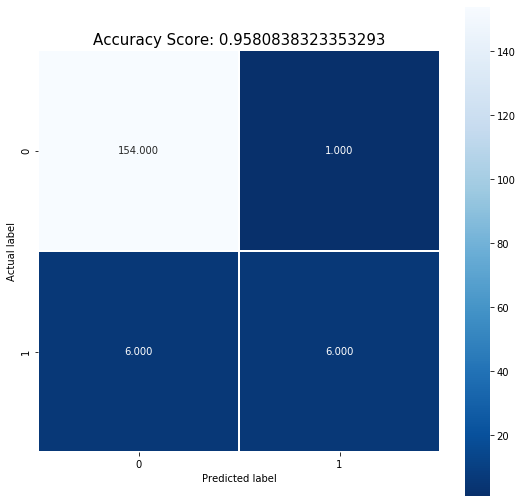

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
